In [35]:
%matplotlib inline

In [36]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
scipy: 0.19.1
numpy: 1.13.3
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.1


In [54]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [55]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [56]:
#shape
print(dataset.shape)

(150, 5)


In [57]:
#head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [58]:
#descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [59]:
#class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [60]:
matplotlib.rcParams['figure.figsize'] = 8, 8

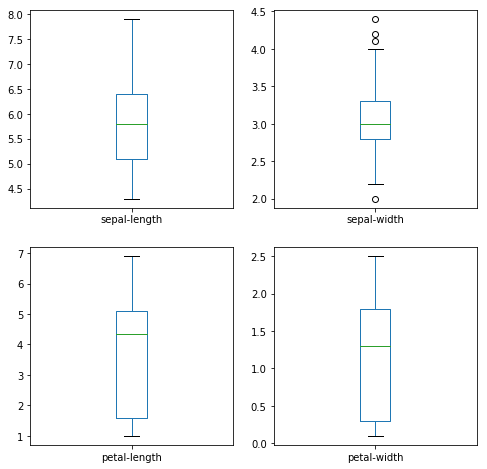

In [61]:
#box and whisker plots
dataset.plot(kind='box',subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

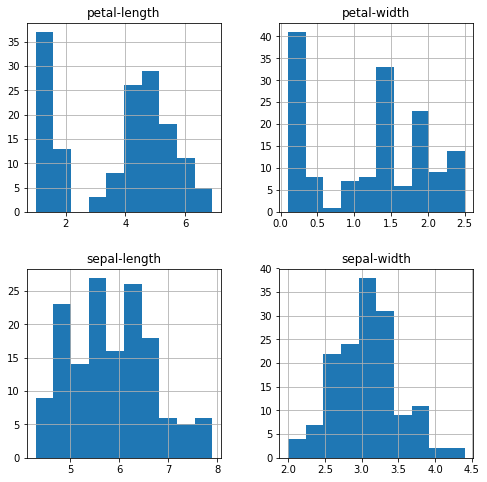

In [62]:
#histogram
dataset.hist()
plt.show()

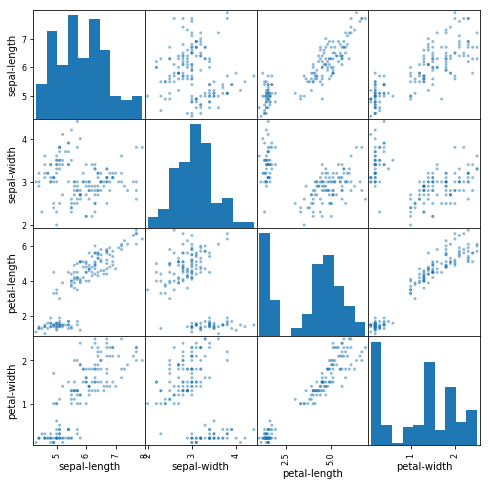

In [63]:
#scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [68]:
# Split-out validation dataset
array = dataset.values
print(array)
X = array[:,0:4]
Y = array[:,4]
print(X)
print(Y)
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size, random_state=seed)

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

In [71]:
print(X_train)
print(Y_train)
print(X_validation)
print(Y_validation)

[[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1.0]
 [4.6 3.6 1.0 0.2]
 [6.9 3.1 5.4 2.1]
 [6.4 2.9 4.3 1.3]
 [4.8 3.0 1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.5 1.4 0.3]
 [7.1 3.0 5.9 2.1]
 [6.7 3.3 5.7 2.1]
 [6.8 2.8 4.8 1.4]
 [6.4 2.8 5.6 2.2]
 [6.5 3.0 5.5 1.8]
 [5.7 3.0 4.2 1.2]
 [5.0 3.3 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [6.0 2.2 4.0 1.0]
 [6.4 2.7 5.3 1.9]
 [4.7 3.2 1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.4 1.5 0.2]
 [7.7 3.8 6.7 2.2]
 [4.3 3.0 1.1 0.1]
 [6.3 3.3 6.0 2.5]
 [5.5 2.4 3.7 1.0]
 [5.0 2.0 3.5 1.0]
 [6.5 2.8 4.6 1.5]
 [5.0 3.4 1.6 0.4]
 [4.4 2.9 1.4 0.2]
 [5.0 3.5 1.6 0.6]
 [6.7 3.1 4.7 1.5]
 [7.3 2.9 6.3 1.8]
 [5.5 2.6 4.4 1.2]
 [5.2 2.7 3.9 1.4]
 [5.7 4.4 1.5 0.4]
 [7.2 3.2 6.0 1.8]
 [5.4 3.4 1.7 0.2]
 [5.8 4.0 1.2 0.2]
 [6.1 2.6 5.6 1.4]
 [5.7 2.5 5.0 2.0]
 [4.8 3.0 1.4 0.1]
 [6.5 3.0 5.8 2.2]
 [4.6 3.2 1.4 0.2]
 [6.6 2.9 4.6 1.3]
 [6.7 3.0 5.2 2.3]
 [6.1 3.0 4.6 1.4]
 [5.7 3.8 1.7 0.3]
 [7.0 3.2 4.7 1.4]
 [4.7 3.2 1.3 0.2]
 [6.5 3.0 5.2 2.0]
 [7.7 2.6 6.9 2.3]
 [4.9 2.4 3.

# 10-fold cross validation

In [72]:
    #test options and evaluation metric
    seed = 7
    scoring = 'accuracy'

In [86]:
#Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


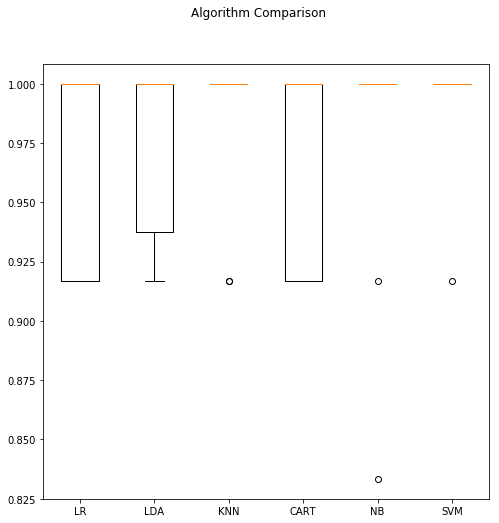

In [87]:
#Compare Algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [89]:
#Make predictions on validation dataset

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

